In [1]:
#Load in data

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np


In [3]:
mobility=pd.read_csv('https://github.com/ils246/covid-19/blob/main/mobility_metrics%20(1).csv?raw=true')

In [4]:
mun_info=pd.read_csv('https://github.com/ils246/covid-19/blob/main/muni_level_info.csv?raw=true')

In [5]:
master=pd.merge(left=mobility,right=mun_info,left_on="code",right_on="code")

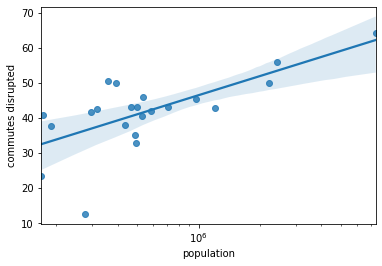

In [6]:
#plots
fig,ax=plt.subplots()
sns.regplot(x=master["population"],y=master["commutes disrupted"],logx=True)
ax.set_xscale('log')

<AxesSubplot:xlabel='GDPpc', ylabel='rel change, daily distance traveled (median)'>

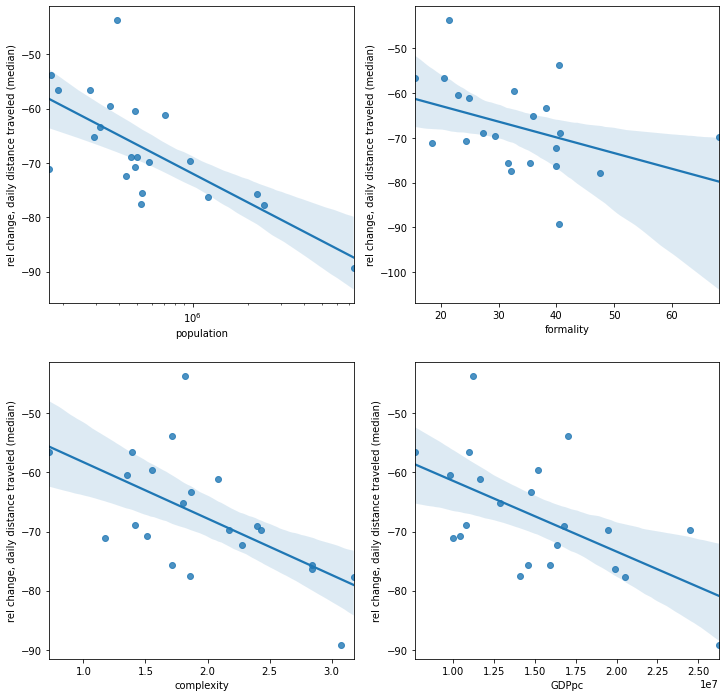

In [7]:
fig,ax=plt.subplots(2,2,figsize=(12,12))
sns.regplot(x=master["population"],y=master["rel change, daily distance traveled (median)"],logx=True,ax=ax[0,0])
ax[0,0].set_xscale('log')
sns.regplot(x=master["formality"]*100,y=master["rel change, daily distance traveled (median)"],ax=ax[0,1])
sns.regplot(x=master["complexity"],y=master["rel change, daily distance traveled (median)"],ax=ax[1,0])
sns.regplot(x=master["GDPpc"],y=master["rel change, daily distance traveled (median)"],ax=ax[1,1])

In [8]:
#regressions
print(sm.OLS(master["commutes disrupted"],np.stack((np.log(master["population"]),np.ones(len(master))),1)).fit().summary())

                            OLS Regression Results                            
Dep. Variable:     commutes disrupted   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     17.54
Date:                Tue, 22 Dec 2020   Prob (F-statistic):           0.000453
Time:                        15:22:29   Log-Likelihood:                -75.455
No. Observations:                  22   AIC:                             154.9
Df Residuals:                      20   BIC:                             157.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             7.8653      1.878      4.188      0.0

In [9]:
print(sm.OLS(master["rel change, daily distance traveled (median)"],np.stack((np.log(master["population"]),np.ones(len(master))),1)).fit().summary())
print(sm.OLS(master["rel change, daily distance traveled (median)"],np.stack((master["formality"]*100,np.ones(len(master))),1)).fit().summary())
print(sm.OLS(master["rel change, daily distance traveled (median)"],np.stack((master["complexity"],np.ones(len(master))),1)).fit().summary())
print(sm.OLS(master["rel change, daily distance traveled (median)"],np.stack((master["GDPpc"],np.ones(len(master))),1)).fit().summary())

                                         OLS Regression Results                                         
Dep. Variable:     rel change, daily distance traveled (median)   R-squared:                       0.488
Model:                                                      OLS   Adj. R-squared:                  0.463
Method:                                           Least Squares   F-statistic:                     19.07
Date:                                          Tue, 22 Dec 2020   Prob (F-statistic):           0.000298
Time:                                                  15:22:29   Log-Likelihood:                -74.083
No. Observations:                                            22   AIC:                             152.2
Df Residuals:                                                20   BIC:                             154.3
Df Model:                                                     1                                         
Covariance Type:                                      n